# Tests for asymmetric reion implementation in CAMB

In [1]:
import camb

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
z=np.arange(0,20,0.1)

In [5]:
#COSMOLOGICAL CONSTANTS
h = 0.6774000
Om_0 = 0.309
Ob_0 = 0.049
obh2 = Ob_0 * h**2
och2 = (Om_0 - Ob_0) * h**2
T_cmb = 2.7255

## Test for model defined through tau

In [6]:
# initial parameters
pars = camb.read_ini('/home/agorce/CAMB-1.3.8_asym/inifiles/params_reion.ini')

In [7]:
print(pars.Reion)

class: <TanhReionization>
 Reionization = True
 use_optical_depth = True
 redshift = 0.0
 optical_depth = 0.058
 fraction = -1.0
 include_helium_fullreion = True
 helium_redshift = 3.5
 helium_delta_redshift = 0.4
 helium_redshiftstart = 5.5
 tau_solve_accuracy_boost = 1.0
 timestep_boost = 1.0
 z_end = 0.0
 z_early = 20.0
 


In [8]:
pars.Reion.use_optical_depth

True

In [9]:
pars.Reion.redshift, pars.Reion.z_end

(0.0, 0.0)

In [10]:
print(f'zre = {pars.get_zre():.2f}')
print(f'tau = {pars.get_tau():.4f}')

zre = 7.31
tau = 0.0580


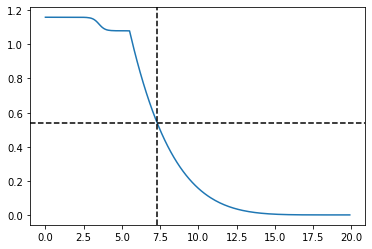

In [13]:
results = camb.get_results(pars)
x = results.get_background_redshift_evolution(z,'x_e')['x_e']
plt.figure()
plt.plot(z, x)
plt.axvline(pars.Reion.get_zre(pars), color='k', ls='--')
plt.axhline(0.5*1.08, color='k', ls='--')

## Model defined through zre

In [14]:
pars = camb.read_ini('/home/agorce/CAMB-1.3.8_asym/inifiles/params_reion2.ini')
print(pars.Reion)

class: <TanhReionization>
 Reionization = True
 use_optical_depth = False
 redshift = 7.31
 optical_depth = 0.0
 fraction = -1.0
 include_helium_fullreion = True
 helium_redshift = 3.5
 helium_delta_redshift = 0.4
 helium_redshiftstart = 5.5
 tau_solve_accuracy_boost = 1.0
 timestep_boost = 1.0
 z_end = 5.6
 z_early = 20.0
 


In [15]:
print(f'zre = {pars.get_zre():.2f}')
print(f'tau = {pars.get_tau():.4f}')

zre = 7.31
tau = 0.0588


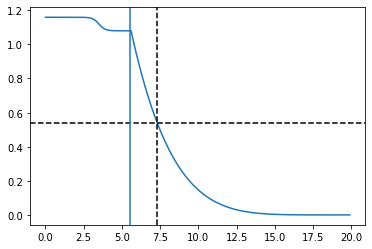

In [17]:
results = camb.get_results(pars) 
x = results.get_background_redshift_evolution(z,'x_e')['x_e']
plt.figure()
plt.plot(z, x)
plt.axvline(pars.Reion.get_zre(pars), color='k', ls='--')
plt.axhline(0.5*1.08, color='k', ls='--')
plt.axvline(5.5)